## Credit Card Detection using Artificial Neural Network

In [1]:
# import Librarise
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Dataset
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


([<matplotlib.patches.Wedge at 0x1243941b6a0>,
 [Text(-1.199982328767447, 0.006512345649200875, 'Genuine '),
  Text(1.1999823292557037, -0.006512255681064681, 'Fraud ')],
 [Text(-2.4999631849321813, 0.013567386769168488, '99.827%'),
  Text(2.4999631859493827, -0.01356719933555142, '0.173%')])

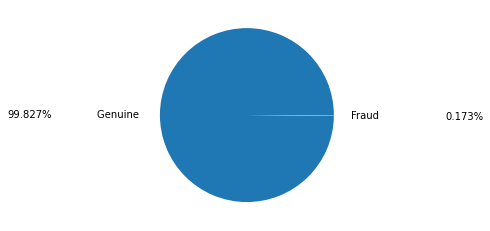

In [6]:
labels = ['Genuine ','Fraud ']
plt.pie(dataset['Class'].value_counts(), labels=labels, autopct='%0.3f%%' , pctdistance=2.5, labeldistance=1.2)

In [7]:
dataset['Class'].value_counts()
# Class 0 is Legitimate , Genuine Transactions
# Class 1 represents Fraudulent Transactions

0    284315
1       492
Name: Class, dtype: int64

dataset.duplicated().value_counts()

In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
dataset.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
dataset=dataset.drop(['Time'], axis=1)

In [11]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
dataset.shape

(283726, 30)

In [13]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
# handle Amount Columns
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X['Amount'] = ss.fit_transform(X['Amount'].values.reshape(-1,1))

## Featuer Selection

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.01238707 0.01779924 0.03258339 0.03847677 0.01349677 0.01464732
 0.02212112 0.01470558 0.03394537 0.07106236 0.06912909 0.10347872
 0.01338688 0.12476409 0.01294325 0.06076539 0.15082049 0.045292
 0.01716162 0.01360956 0.01707166 0.01312476 0.00968472 0.01292525
 0.01070184 0.01539879 0.01403025 0.01183941 0.01264725]


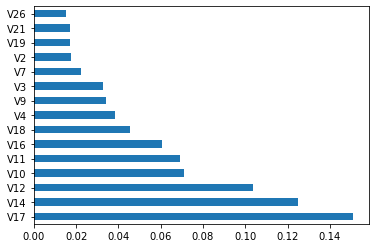

In [18]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [19]:
X=X[['V17','V14','V12','V10','V11','V16','V18','V4','V9','V7','V3','V21','V19','V8','V2']]

## Handled Imblanced Dataset - SMOTE

In [20]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# print('Original dataset shape %s' % Counter(y))
# smote = SMOTE(random_state=10)
# X_smote,y_smote = smote.fit_resample(X,y)
# print('Resampled dataset shape %s' % Counter(y_smote))

In [21]:
# lets create train and test data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1)

<IPython.core.display.Javascript object>

## ANN Model

In [22]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
Classifier = Sequential()

In [24]:
Classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu',input_dim=15))

In [25]:
Classifier.add(Dense(units=10, kernel_initializer='he_uniform',activation='relu'))

In [26]:
Classifier.add(Dense(units=5, kernel_initializer='he_uniform',activation='relu'))

In [27]:
Classifier.add(Dense(units=1, activation='sigmoid'))

In [28]:
Classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
Classifier.fit(X_train,y_train, batch_size=10, validation_split=0.33, epochs=10)

Epoch 1/10
15208/15208 [==============================] - 26s 2ms/step - loss: 0.0713 - accuracy: 0.9639 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 2/10
15208/15208 [==============================] - 23s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 3/10
15208/15208 [==============================] - 24s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 4/10
15208/15208 [==============================] - 24s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 5/10
15208/15208 [==============================] - 29s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 6/10
15208/15208 [==============================] - 26s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 7/10
15208/15208 [==============================] - 25s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0

## Model With Kernel Tunnel

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import keras
from kerastuner.tuners import RandomSearch

#### Hyperparameters
1. How many number of hidden layers we should have?
2. How many number of neurons we should have in hidden layers?
3. Learning Rate 

In [34]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [35]:
tuner = RandomSearch(build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='creditcarddetection')

INFO:tensorflow:Reloading Oracle from existing project project\creditcarddetection\oracle.json


In [36]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    pass

<IPython.core.display.Javascript object>

In [38]:
tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 1 Complete [00h 09m 12s]
val_accuracy: 0.998742938041687

Best val_accuracy So Far: 0.998742938041687
Total elapsed time: 00h 09m 12s

Search: Running Trial #2

Hyperparameter    |Value             |Best Value So Far 
num_layers        |16                |10                
units_0           |448               |384               
units_1           |320               |64                
learning_rate     |0.01              |0.01              
units_2           |448               |32                
units_3           |224               |32                
units_4           |160               |32                
units_5           |128               |32                
units_6           |480               |32                
units_7           |192               |32                
units_8           |256               |32                
units_9           |192               |32                

Epoch 1/10
7094/7094 [==============================] - 80s 11ms/step - loss: 46070.7594 - 

KeyboardInterrupt: 

In [40]:
# # Build the model with the optimal hyperparameters and train it on the data
# model = tuner.hypermodel.build(best_hps)
# model.fit(X_train, y_train, epochs = 1, validation_data = (X_test, y_test))